In [1]:
import numpy as np
from scipy.linalg import lu
from numpy.linalg import cholesky as llt
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica Neue"],
    "font.size": 28,
    })
from time import time

## Constrained advertising example
Taken from VMLS book, page 341

In [2]:
m, n = 10, 3
A = np.array([
    [0.97, 1.86, 0.41],
    [1.23, 2.18, 0.53],
    [0.80, 1.24, 0.62],
    [1.29, 0.98, 0.51],
    [1.10, 1.23, 0.69],
    [0.67, 0.34, 0.54],
    [0.87, 0.26, 0.62],
    [1.10, 0.16, 0.48],
    [1.92, 0.22, 0.71],
    [1.29, 0.12, 0.62]
    ])
v_des = 1000*np.ones(10)
B = 1284 # Total budget

In [3]:
# Formulate constrained least squares probl;em
C = np.ones((1, n))
d = np.array([B])

In [4]:
def forward_substitution(L, b):
    n = L.shape[0]
    x = np.zeros(n)
    for i in range(n):
        x[i] = (b[i] - L[i,:i] @ x[:i])/L[i, i]
    return x

def backward_substitution(U, b):
    n = U.shape[0]
    x = np.zeros(n)
    for i in reversed(range(n)):
        x[i] = (b[i] - U[i,i+1:] @ x[i+1:])/U[i, i]
    return x

def lstsq(A, b):
    M = A.T.dot(A)
    q = A.T.dot(v_des)
    L = llt(M)
    x = forward_substitution(L, q)
    x = backward_substitution(L.T, x)
    return x
    
def con_lstsq(A, b, C, d):
    p, n = C.shape
    KKT = np.block([[2*A.T @ A, C.T], 
                [C, np.zeros((p, p))]])
    rhs = np.hstack([2*A.T @ b, d])
    P, L, U = lu(KKT)
    x = P.T @ rhs
    x = forward_substitution(L, x)
    x = backward_substitution(U, x)
    return x[:n]

In [5]:
x_ls = lstsq(A, v_des)
x_ls = x_ls/np.sum(x_ls)*B
x_ls

array([  49.66442212,   79.99303251, 1154.34254537])

In [6]:
x_cls = con_lstsq(A, v_des, C, d)
x_cls

array([315.16818459, 109.86643348, 858.96538193])

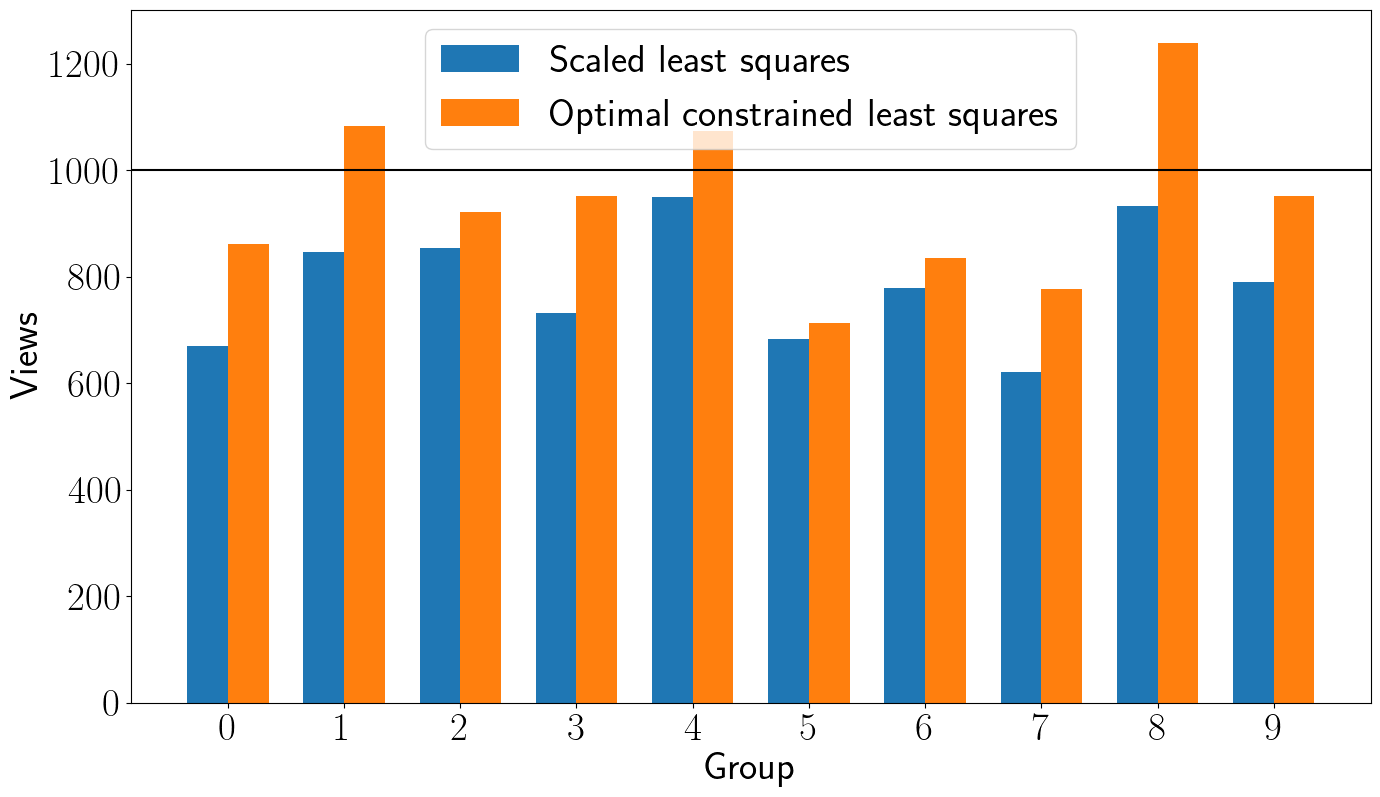

In [7]:
width=0.35
fig = plt.figure(figsize=(16, 9))
plt.bar(np.arange(m) - width/2, A.dot(x_ls), width, label="Scaled least squares")
plt.bar(np.arange(m) + width/2, A.dot(x_cls), width, label="Optimal constrained least squares")
plt.axhline(y=1000, color='k', linestyle='-')
plt.xticks(np.arange(m))
plt.xlabel("Group")
plt.ylabel("Views")
plt.legend()
plt.savefig('advertising_budget.pdf')

In [8]:
rms_ls = np.linalg.norm(A @ x_ls - v_des)/np.linalg.norm(v_des)
rms_cls = np.linalg.norm(A @ x_cls - v_des)/np.linalg.norm(v_des)
cost_ls = np.sum(x_ls)
cost_cls = np.sum(x_cls)

print("Cost least squares = %d" % cost_ls)
print("Cost constrained least squares = %d" % cost_cls)
print("RMS least squares = %.2f%%" % (rms_ls * 100))
print("RMS constrained least squares = %.2f%%" % (rms_cls*100))

Cost least squares = 1284
Cost constrained least squares = 1284
RMS least squares = 23.85%
RMS constrained least squares = 16.10%
